# Simple usage

This notebook demonstrates basic usage of the *openTSNE* library. This is sufficient for almost all use-cases.

In [1]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

from examples import utils

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Load data

In most of the notebooks, we will be using the Macosko 2015 mouse retina data set. This is a fairly well-known and well explored data set in the single-cell literature making it suitable as an example.

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


## Create train/test split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [5]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


## Run t-SNE

We'll first create an embedding on the training data.

In [6]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

In [7]:
%time embedding_train = tsne.fit(x_train)

Iteration   50, KL divergence  5.7889, 50 iterations in 1.2277 sec
Iteration  100, KL divergence  5.2496, 50 iterations in 1.1978 sec
Iteration  150, KL divergence  5.1563, 50 iterations in 1.1671 sec
Iteration  200, KL divergence  5.1203, 50 iterations in 1.3511 sec
Iteration  250, KL divergence  5.1018, 50 iterations in 1.4377 sec
Iteration   50, KL divergence  3.7958, 50 iterations in 1.5298 sec
Iteration  100, KL divergence  3.4076, 50 iterations in 1.3780 sec
Iteration  150, KL divergence  3.1945, 50 iterations in 1.3263 sec
Iteration  200, KL divergence  3.0541, 50 iterations in 1.5235 sec
Iteration  250, KL divergence  2.9521, 50 iterations in 2.1700 sec
Iteration  300, KL divergence  2.8745, 50 iterations in 2.4172 sec
Iteration  350, KL divergence  2.8131, 50 iterations in 3.0004 sec
Iteration  400, KL divergence  2.7642, 50 iterations in 3.9832 sec
Iteration  450, KL divergence  2.7241, 50 iterations in 4.3934 sec
Iteration  500, KL divergence  2.6918, 50 iterations in 5.2797

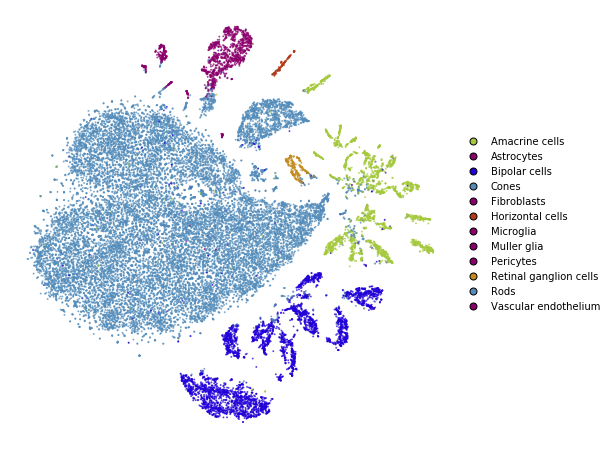

In [8]:
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

## Transform

openTSNE is currently the only library that allows embedding new points into an existing embedding.

In [9]:
%time embedding_test = embedding_train.transform(x_test)

Iteration   50, KL divergence  214515.0279, 50 iterations in 11.2446 sec
Iteration   50, KL divergence  204042.5486, 50 iterations in 11.1324 sec
CPU times: user 4min 13s, sys: 4.9 s, total: 4min 17s
Wall time: 24.2 s


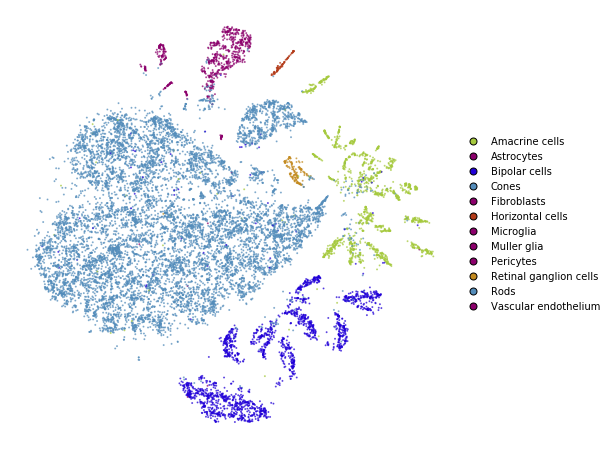

In [10]:
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)

## Together

We superimpose the transformed points onto the original embedding with larger opacity.

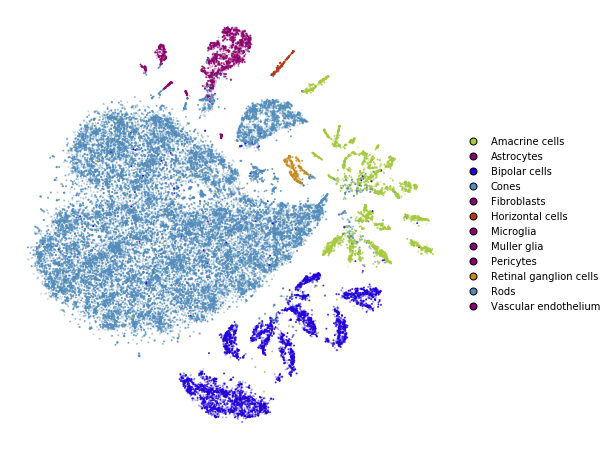

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)